In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
warnings.filterwarnings('ignore')

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df = sns.load_dataset('taxis')

In [8]:
df.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [9]:
df.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [11]:
df.shape

(6433, 14)

In [12]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [13]:
df['dropoff_borough'].value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

In [14]:
df['pickup_borough'].value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [15]:
df.dropna()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [16]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [83]:
sns.set_style('darkgrid')
sns.set_palette('Spectral')

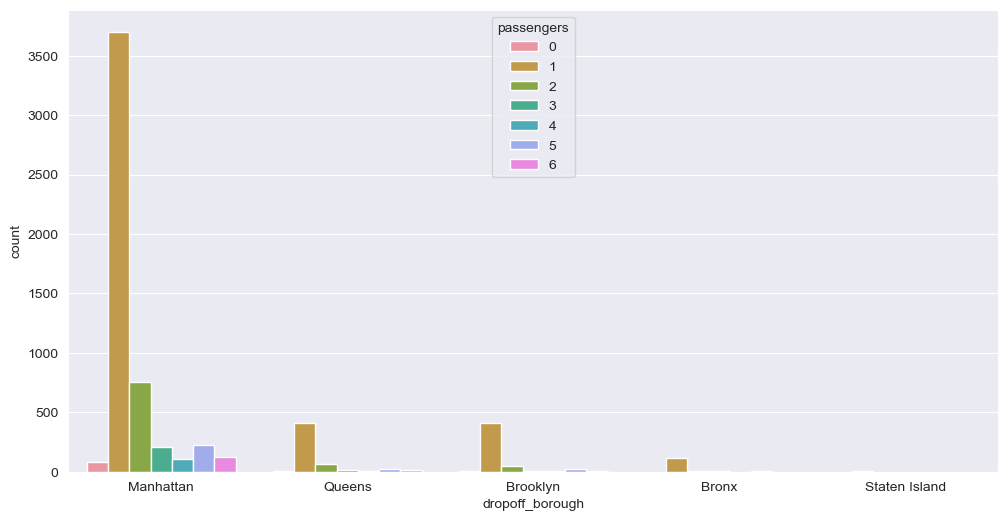

In [119]:
plt.figure(figsize=(12,6))
sns.countplot(data = df,x = 'dropoff_borough',hue='passengers')
plt.show()

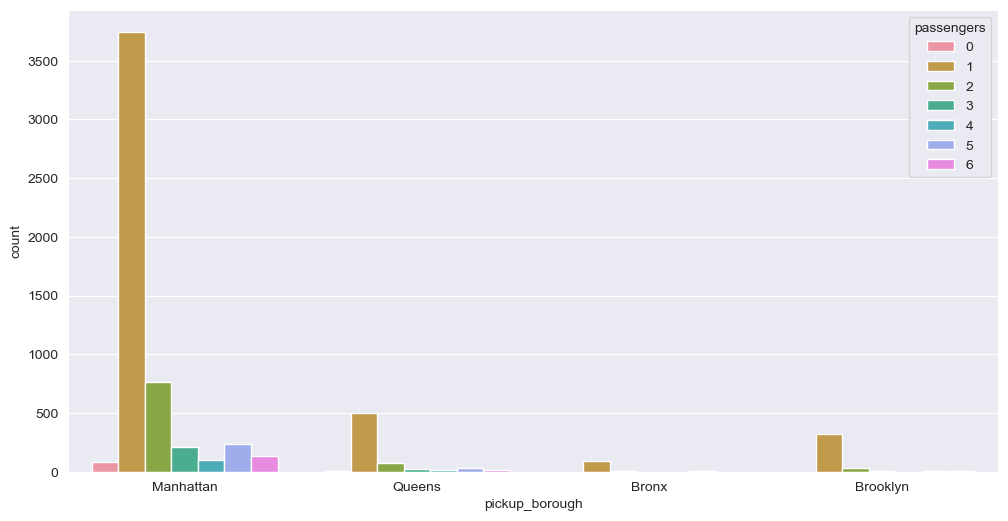

In [120]:
plt.figure(figsize=(12,6))
sns.countplot(data = df,x = 'pickup_borough',hue='passengers')
plt.show()

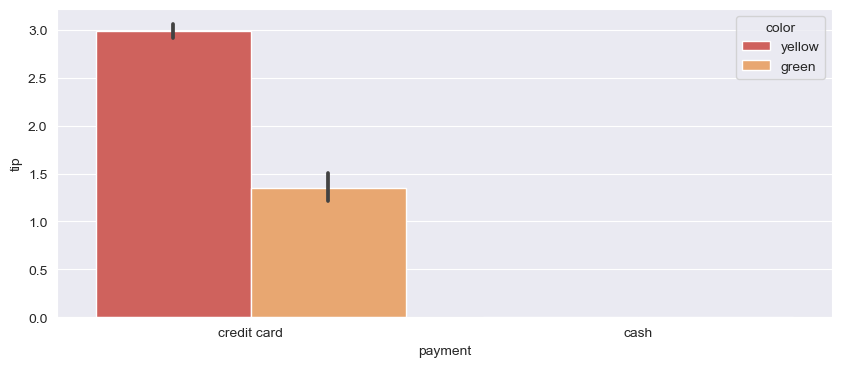

In [84]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,x='payment',y='tip',hue='color')
plt.show()

In [56]:
df['payment'].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [65]:
df.head(2)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


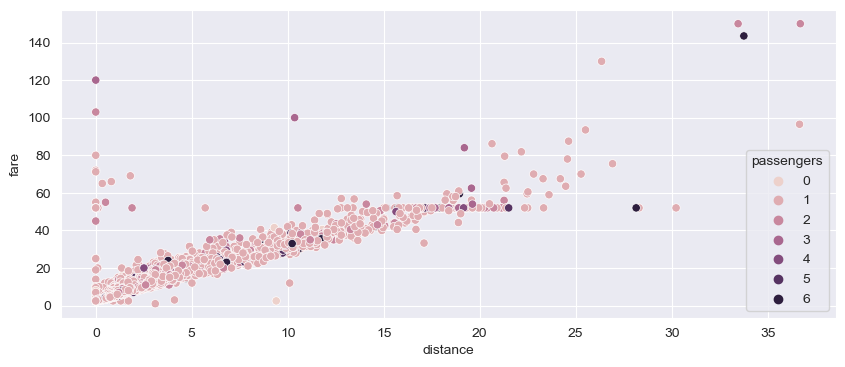

In [85]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='distance',y='fare',hue='passengers')
plt.show()

In [72]:
df['tolls'].value_counts()

0.00     6083
5.76      324
2.64        7
11.52       4
12.50       2
5.54        2
6.12        2
8.40        1
17.28       1
16.26       1
9.50        1
5.75        1
24.02       1
8.50        1
18.90       1
4.75        1
Name: tolls, dtype: int64

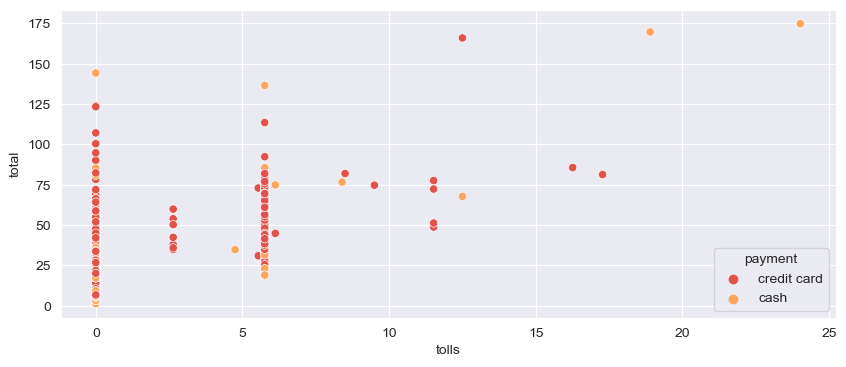

In [86]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='tolls',y='total',hue='payment')
plt.show()

<AxesSubplot:xlabel='total', ylabel='distance'>

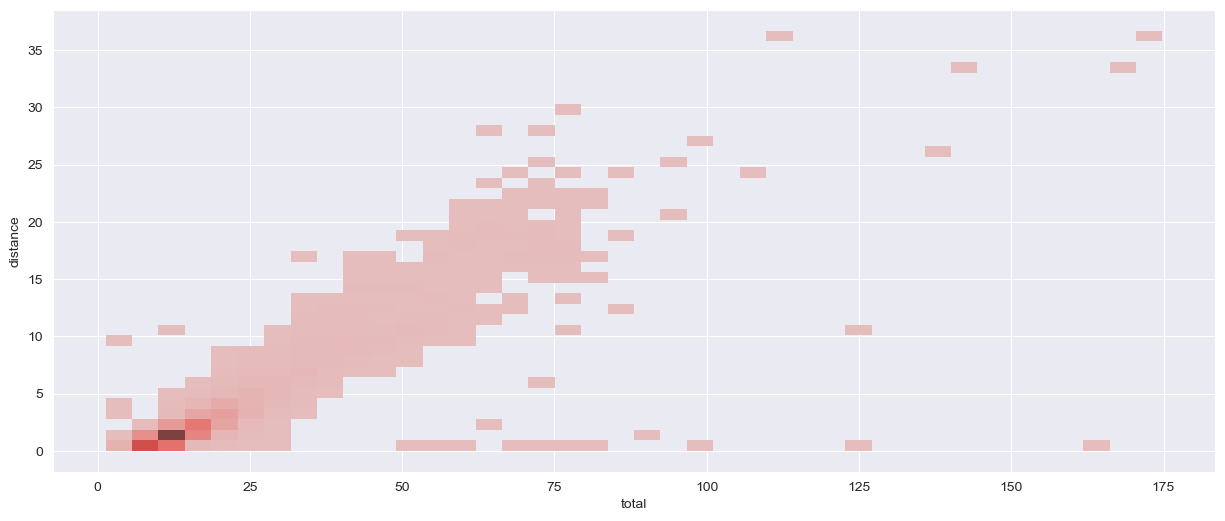

In [99]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,x='total',y='distance',bins=40)

In [90]:
df.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan


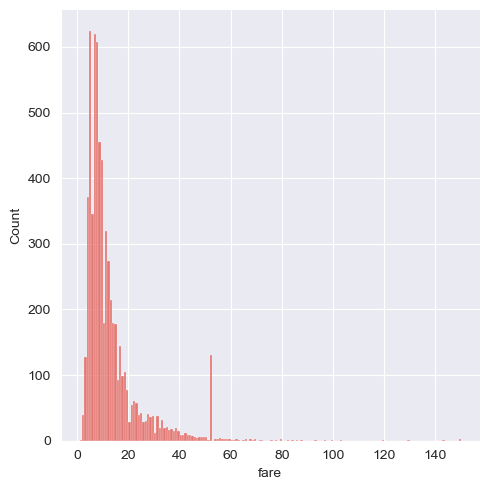

<Figure size 1500x600 with 0 Axes>

In [151]:
sns.displot(data=df,x='fare')
plt.figure(figsize=(15,6))
plt.show()

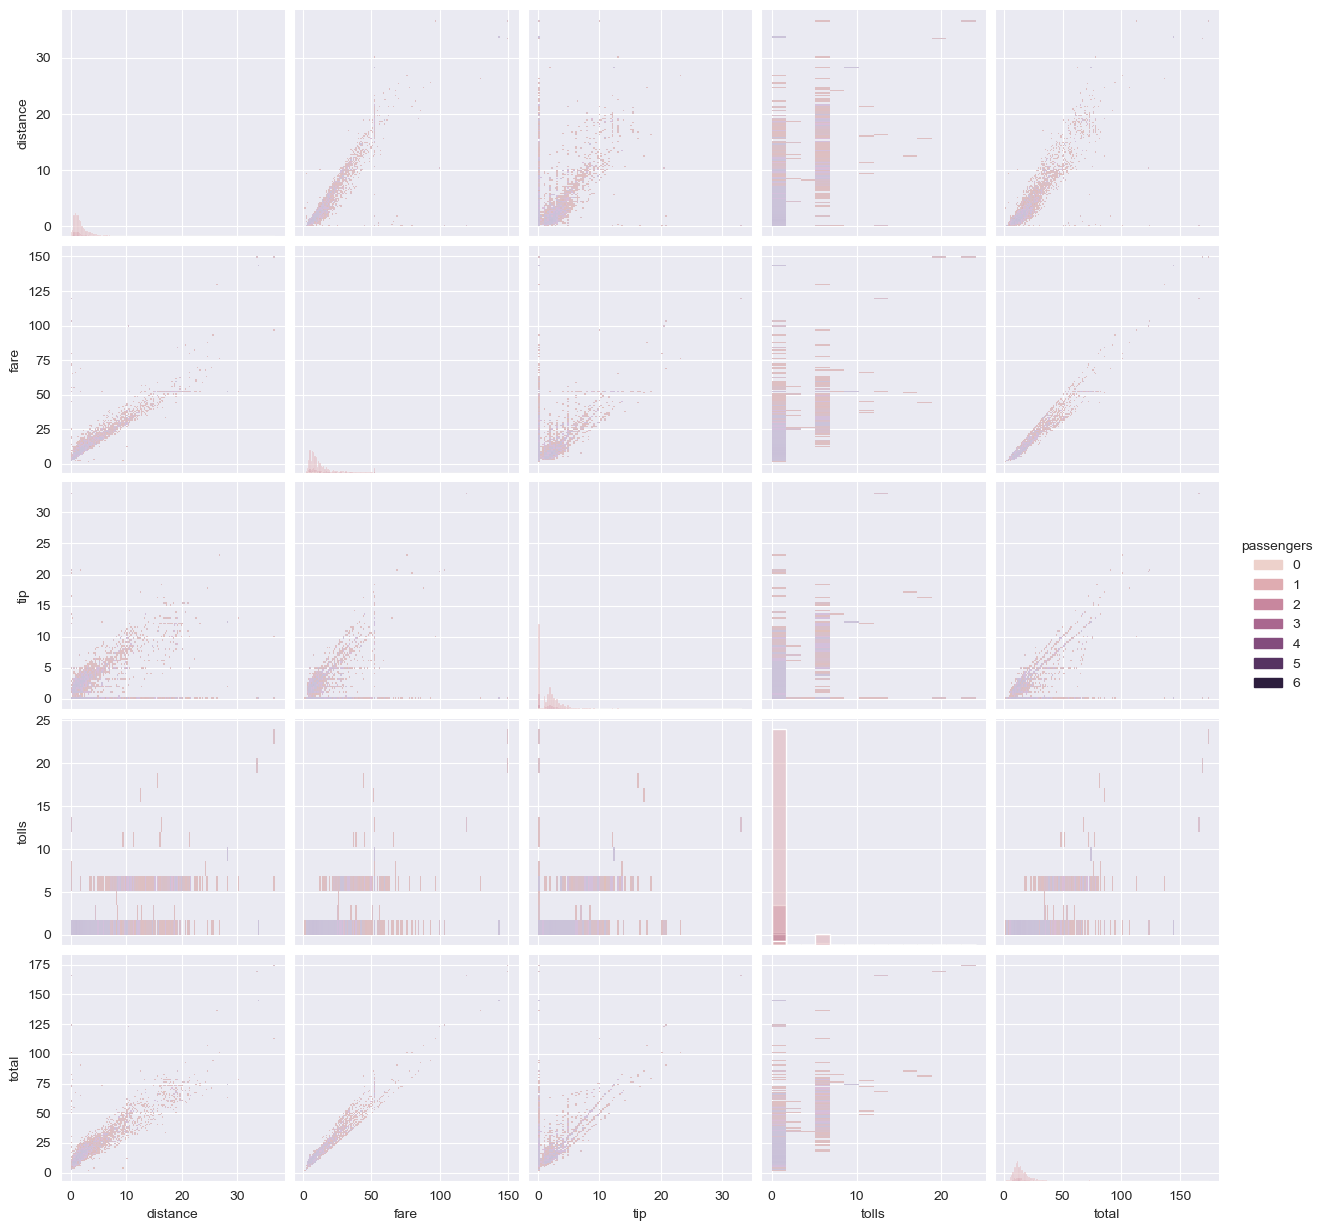

In [124]:
sns.pairplot(df,hue='passengers',kind='hist')

In [126]:
cor_ = df.corr()

<AxesSubplot:>

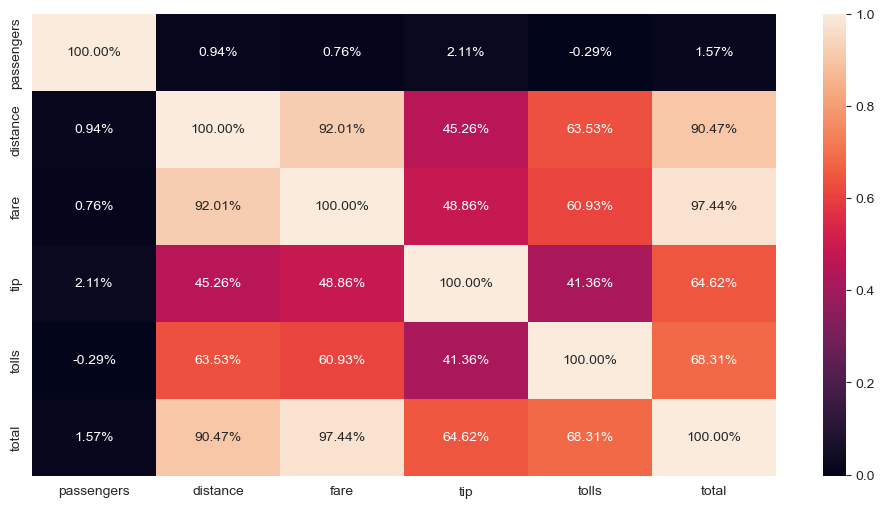

In [132]:
plt.figure(figsize=(12,6))
sns.heatmap(cor_,annot=True,fmt='1.02%')

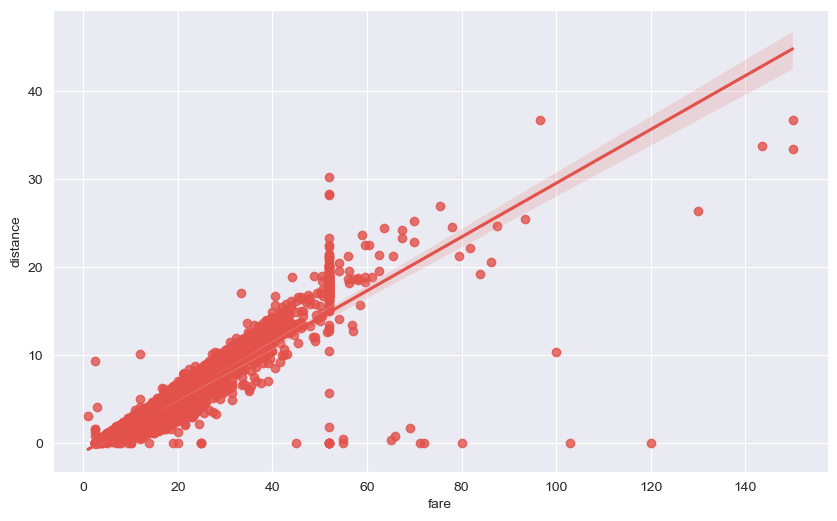

In [154]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='fare',y='distance',fit_reg=True)
plt.show()

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [156]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

Importing sklearn model

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [160]:
x = df[['passengers', 'distance', 'fare', 'tip', 'tolls']]

In [163]:
y = df['total']

Train test split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100) 

In [165]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4824, 5), (1609, 5), (4824,), (1609,))

Linear Regression model

In [166]:
lrm = LinearRegression().fit(x_train,y_train)

In [167]:
lrm.coef_

array([0.07122054, 0.00435566, 0.96608992, 1.16919704, 1.00808202])

In [168]:
lrm.intercept_

3.093359806529431

In [169]:
lrm.score(x,y)

0.9940186647097594

In [171]:
predict = lrm.predict(x_test)

In [174]:
#finding out the erroe in the model

residuals = y_test - predict

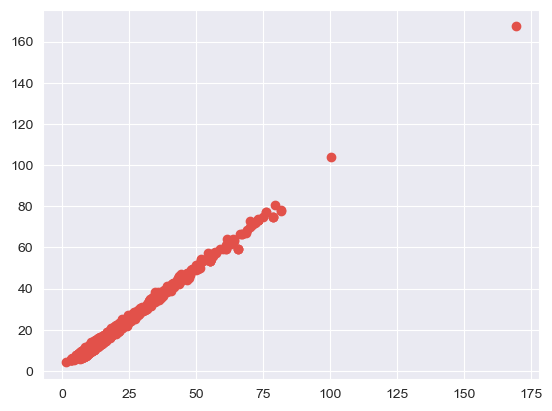

In [176]:
#scatter of predication
plt.scatter(y_test,predict)

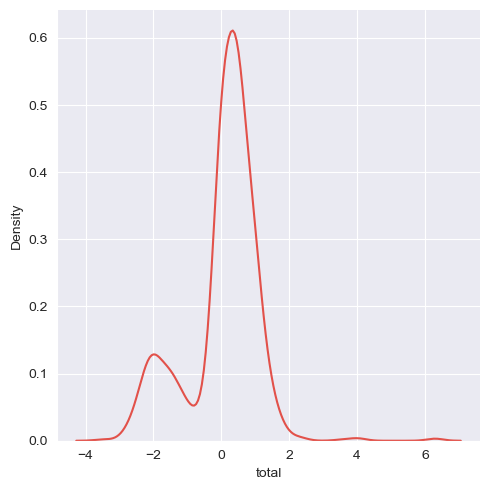

In [184]:
sns.displot(residuals,kind='kde')

Logistic Regression

In [194]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [197]:
df_2 = df.copy() 

In [200]:
df_2 = df_2.apply(encoder.fit_transform)

In [203]:
X = df_2[['passengers', 'distance', 'fare', 'tip', 'tolls']]

In [204]:
Y = df_2 ['total']

In [205]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,random_state=100)

In [207]:
Lr = LogisticRegression().fit(X_train,Y_train)

In [208]:
Lr.coef_

array([[ 1.37216469e-02, -4.77343008e-02,  6.19510469e-03,
        -2.87459825e-02, -1.93712038e-05],
       [ 2.29941514e-04, -6.32091737e-02, -6.12830592e-03,
        -2.74011110e-02, -1.93108154e-05],
       [ 7.42772941e-03, -1.63704055e-02,  1.75007334e-03,
        -2.94580353e-02, -1.94767342e-05],
       ...,
       [-7.62306096e-04,  1.08492662e-02,  7.72034462e-02,
        -9.73022105e-02, -1.17304770e-03],
       [-5.75840080e-04, -1.73792811e-01,  7.80774789e-02,
         9.73028171e-02,  1.02391557e-02],
       [-4.90698585e-03,  1.07113798e-02,  7.76629824e-02,
        -9.73270668e-02,  1.43875078e-02]])

In [209]:
Lr.intercept_

array([ 1.29551569e-02,  4.92314185e-04,  6.67854316e-03,  9.71712612e-03,
        1.16871363e-02,  4.91898516e-04,  1.37904498e-03,  4.26363153e-04,
        7.93936991e-03,  4.22205862e-04,  4.49206994e-04,  2.18917639e-02,
        4.40522224e-04,  3.82638956e-04,  3.96544667e-04,  2.47477950e-02,
        1.14563610e-03,  4.41029360e-03,  4.32486556e-04,  3.44327757e-02,
        4.25070919e-04,  7.84793791e-04,  3.81581051e-04,  2.66282876e-03,
        1.16106047e-03,  5.32250032e-02,  4.53658877e-04,  3.78417356e-04,
        1.50650890e-03,  4.50395740e-03,  4.37463117e-04,  4.67982801e-04,
        5.07996787e-02,  2.46102711e-04,  3.01858361e-03,  1.33495310e-03,
        4.32534725e-04,  3.17805954e-03,  3.67625663e-03,  1.13938744e-03,
        5.79986248e-02,  1.38687334e-04,  1.08002007e-03,  2.69282250e-03,
        8.10241635e-04,  4.59463728e-04,  4.42880766e-04,  1.03011852e-03,
        1.28053464e-02,  6.84407976e-02,  4.38635130e-04,  2.11521713e-03,
        2.46119723e-03,  

In [210]:
Lr.score(X,Y)

0.05145344318358464

In [212]:
pre_ = Lr.predict(X_test)

In [215]:
residuals = Y_test - pre_

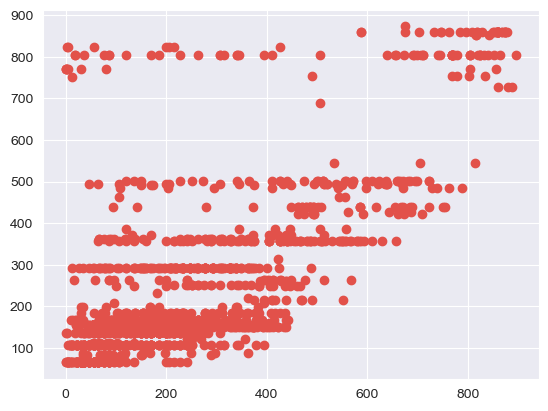

In [216]:
plt.scatter(Y_test , pre_)